Step 1 Data Visulization

In [1]:
import pandas as pd
import nltk

Reading DataSet

In [5]:
df=pd.read_csv("sample_data/spam.csv",encoding='latin-1')

In [10]:
df.head(5)  #displays the first five data of the dataset

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.shape #give the size of dataset

(5572, 5)

In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) #drop the unwanted columns

In [17]:
df.rename(columns={'v1':'target','v2':'sms'},inplace=True) #rename the columns
df.sample(5)  #random  entries

,target,sms
342,ham,Where u been hiding stranger?
4217,ham,Actually i'm waiting for 2 weeks when they sta...
3761,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...
1494,ham,It has everything to do with the weather. Keep...
4354,ham,"Sorry, I can't help you on this."


In [18]:
df.groupby('target').describe() #shows the dataset

sms                                                               
       count unique                                                top freq
target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [22]:
df=df.drop_duplicates(keep='first')  #remove the duplicates but keep the first

In [23]:
df.groupby('target').describe()

sms                                                               
       count unique                                                top freq
target                                                                     
ham     4516   4516  Go until jurong point, crazy.. Available only ...    1
spam     653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [24]:
df["Lenghth"]=df["sms"].apply(len)

In [25]:
df.head(2)

,target,sms,Lenghth
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

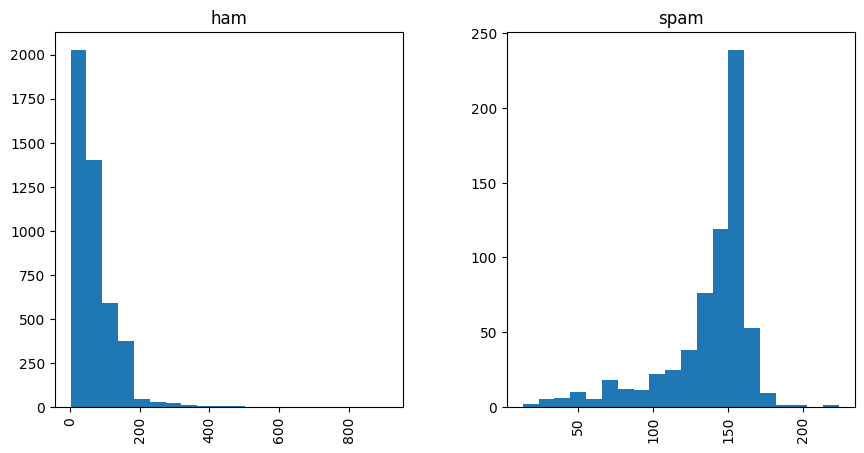

In [26]:
df.hist(column='Lenghth',by='target',bins=20,figsize=(8,4)) #created a histogram graph
# bins 20 means how many entries are there from 0 to 50 and 50 to 100
# x axis=length of sms => good sms have average shorter length and spam sms has average higher length

Step 2- Preprocessing

In [43]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('punkt_tab')
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [39]:
df.head(5)

,target,sms,Lenghth
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [44]:
import string

def clean_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)   #checking for numbers and alphabet characters.

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))  #stem means base of the word

  return " ".join(y)  #joining all the tokens with white space

In [45]:
df['sms_cleaned']=df['sms'].apply(clean_text)

In [46]:
df.head(8)

,target,sms,Lenghth,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,freemsg hey darl 3 week word back like fun sti...
6,ham,Even my brother is not like to speak with me. ...,77,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,per request mell oru minnaminungint nurungu ve...


Step 3- Feature Extractions

In [47]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [66]:
tf_vec=TfidfVectorizer(max_features=3000)
X=tf_vec.fit_transform(df['sms_cleaned']).toarray() #text to numbers

In [67]:
X.shape #size 2d array given. vocabulary size is 3000. rows are sms. coulmns are vocabulary3000 szie

(5169, 3000)

In [68]:
Y=df['target'].values  # for y axis

Step 4-Learning

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2) # test size 0.2 means 20% of data set will be used for training and rest will be for testing or validation.

In [70]:
from sklearn.naive_bayes import MultinomialNB # naive_bayes is a machine learning algotitm.

model=MultinomialNB()
model.fit(x_train,y_train)  # modle will learni the relationship between x and y

MultinomialNB()

In [71]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test) # what is the y available in the test data
print(accuracy_score(y_test,y_pred))
#y_pred means y valvues predicted by the model.

0.9709864603481625


This means 97.1% of predictions are correct.